In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#plt.style.available()


In [25]:
df = pd.read_csv('dados_limpos.csv', encoding='latin1', parse_dates=['DATA'])

In [26]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
0,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13
1,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18
2,2016,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1
3,2016,1,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16
4,2016,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1


In [27]:
df[df['VALOR_REEMBOLSADO'] >= 256980]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA
4637,2017,12,DAVI ALCOLUMBRE,Divulgações,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,22


In [28]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,DIA
count,26688.000000,26688.000000,26688.000000,26688.000000
mean,2016.022482,6.470736,947.489558,15.430680
std,1.481181,3.257139,2733.963252,8.846572
min,1977.000000,1.000000,0.010000,1.000000
25%,2016.000000,4.000000,123.997500,8.000000
50%,2016.000000,6.000000,324.745000,15.000000
75%,2016.000000,9.000000,956.762500,23.000000
max,2106.000000,12.000000,256980.000000,31.000000


In [29]:
senadores_com_mais_gastos = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()
senadores_com_mais_gastos = senadores_com_mais_gastos.sort_values(ascending=False)
senadores_com_mais_gastos

SENADOR
DAVI ALCOLUMBRE            510076.07
JOÃO CAPIBERIBE            502997.57
TELMÁRIO MOTA              488678.92
PAULO ROCHA                485114.40
VANESSA GRAZZIOTIN         477079.76
RANDOLFE RODRIGUES         471847.84
SÉRGIO PETECÃO             463456.45
GLADSON CAMELI             459977.83
ROMERO JUCÁ                446448.98
CIRO NOGUEIRA              440047.81
FERNANDO BEZERRA COELHO    435141.96
HUMBERTO COSTA             433763.14
ÂNGELA PORTELA             429605.98
ELMANO FÉRRER              428961.30
FERNANDO COLLOR            420471.01
JOSÉ MEDEIROS              418157.60
PAULO PAIM                 415852.91
IVO CASSOL                 415382.40
WELLINGTON FAGUNDES        415154.23
VALDIR RAUPP               415018.64
ROSE DE FREITAS            396088.44
PAULO BAUER                394455.84
OMAR AZIZ                  390372.08
JOSÉ PIMENTEL              379273.11
MAGNO MALTA                378840.79
LINDBERGH FARIAS           377653.66
ROBERTO ROCHA              364

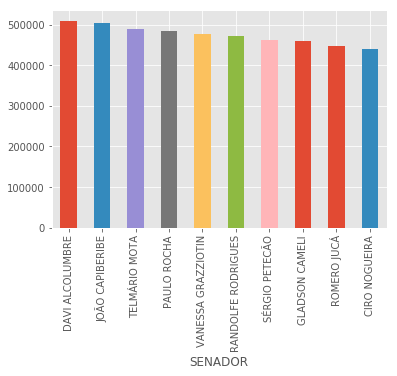

In [30]:
senadores_com_mais_gastos.head(10).plot(kind='bar', grid=True)
plt.show()


In [31]:
import matplotlib as mp

In [32]:
mp.__version__

'3.0.1'

NameError: name 'plot' is not defined

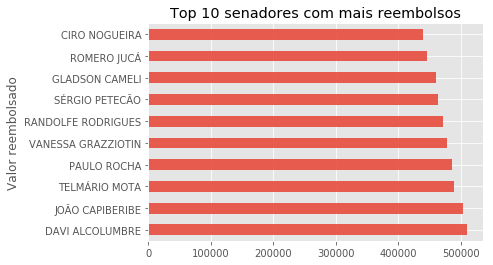

In [33]:
senadores_com_mais_gastos.head(10).plot(kind='barh', grid=True, color='#e74c3c', alpha=.9)
plt.title('Top 10 senadores com mais reembolsos')
plt.ylabel('Valor reembolsado')
plt.savefig('top_10_senadores_gastos.png')
plot.show('Top 10 senadores com mais reembolsos')

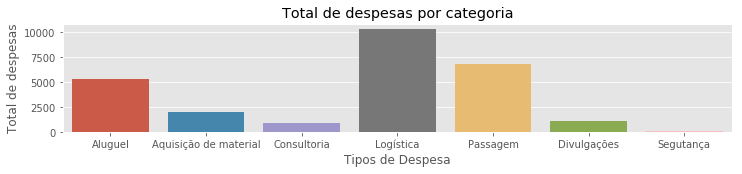

In [35]:
plt.figure(figsize=(12,2))
sns.countplot(x=df['TIPO_DESPESA'])
plt.title('Total de despesas por categoria')
plt.ylabel('Total de despesas')
plt.xlabel('Tipos de Despesa')
plt.show()

In [55]:
df['ANO_MES'] = df['DATA'].dt.strftime('%Y-%m')

In [73]:
pivot_df = df.pivot_table(index='ANO_MES', 
                          columns='TIPO_DESPESA', 
                          values='VALOR_REEMBOLSADO', 
                          aggfunc=np.count_nonzero, 
                          fill_value=0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

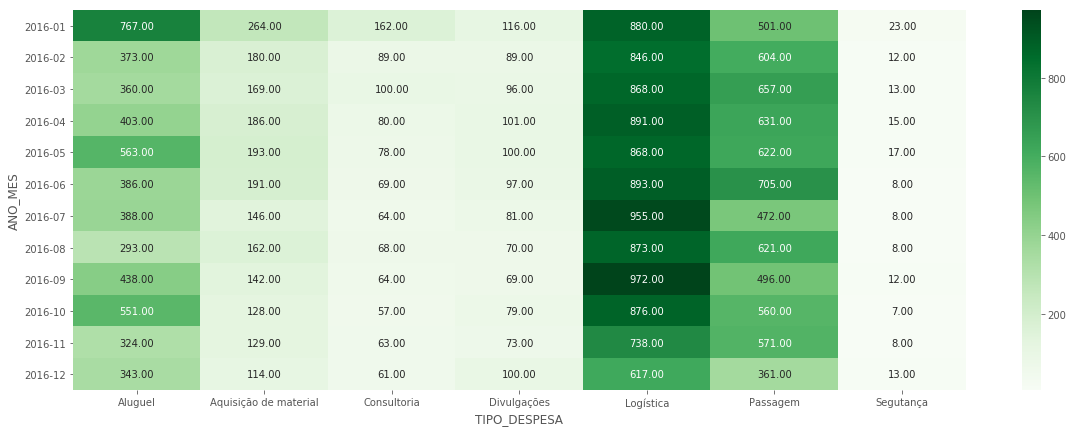

In [75]:
plt.figure(figsize=(20,7))
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='Greens')
plt.show()

In [59]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,ANO_MES
0,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60,13,2016-01
1,2016,1,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84,18,2016-01
2,2016,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,1,2016-04
3,2016,1,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48,16,2016-01
4,2016,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00,1,2016-06


In [60]:
#df[df['ANO_MES'] == '1977-10'] == 2016 # da erro
#df.loc[df['ANO_MES'] == '1977-10'] == 2016 #não da erro

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,DIA,ANO_MES
17926,1977,10,PAULO PAIM,Logística,37.063.328/0030-00,Auto Shopping Derivados de Petroleo Ltda,621942,1977-10-10,Aquisição de combustível para veículos utiliza...,152.51,10,1977-10


In [65]:
pivot_df.loc['2016-01':'2016-12']

DIA,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
MES,,,,,,,,,,,,,,,,,,,,,
